# Capstone Project - Analysing Neighbourhoods in Singapore

### Introduction

Singapore is a small nation-state, and we are one of the most densest countries in the world; actually, we are ***the*** [second-most](https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density) dense country in the world.

We are also considered a very developed country, with high standards of education, healthcare, and personal safety.
This makes Singapore ***the*** [most expensive city](https://www.economist.com/graphic-detail/2018/03/15/asian-and-european-cities-compete-for-the-title-of-most-expensive-city) in the world to live in, especially for expats.

### Business Problem

Which leads to the business problem: how does one find a place to live in? Of course the most obvious answer is in the central area, but the prices there are prohibitively expensive (unless you are the [CEO of Dyson](https://www.bbc.com/news/business-48932334))

And so this is the main question I will attempt to answer for my project: how does one find a place to stay in Singapore? What are the main amenities and facilities in each area, that would suit a prospective buyer?

Given the high cost of buying/renting a house in Singapore, this analysis would be able to help not only expats, but also local Singaporeans like myself who are looking for a place to stay. I hope that I am able to shed some insight on the different neighbourhoods in Singapore and what they might offer to a prospective buyer.

### Data

My main data sources will be Foursquare and Wikipedia. I will be using Wikipedia mainly to extract a table of the neighbourhoods in Singapore. Singapore is a very tightly controlled nation-state, and the government works hard to ensure that every single plot of land is used as effectively as possible. This leads to the government-created ["Planning Areas"](https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore) for Singapore.

There are 55 such areas, and the purpose/design of each area has been carefully planned and thought out. 
Of course, not all these areas are meant for housing, and so I will need to carefully filter the data to ensure that I only select the areas which are designated for housing.

I will then use Foursquare to extract data on each of these planning areas. Singapore's size and [highly developed transport infrastructure](https://www.straitstimes.com/singapore/transport/spore-public-transport-system-tops-global-list) will mean that I will need to carefully tweak the "limit" and "radius" parameters when using the Foursquare API. I will go into more detail in the methodology section.

Using the data extracted, I hope to run clustering and other machine learning techniques to uncover some insights on all the different neighborhoods in Singapore; although we are quite a small nation, our neighborhoods are not as homogenous as one may think.

### Data Collection and Wrangling 

Firstly, we import all the packages and modules needed for this project.
It is a bit lengthy but I think it will be easier to go through this notebook afterwards.

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [5]:
CLIENT_ID = '3PSCGIN4CXUNEGR4T1B5DMLJMFWJFQT4XQJ40TUEMOLS1BVW' # your Foursquare ID
CLIENT_SECRET = 'I20J4QPLOY14QWASORWK2REWKP1D1M4N4EGAL422OFZ32BLR' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 40
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3PSCGIN4CXUNEGR4T1B5DMLJMFWJFQT4XQJ40TUEMOLS1BVW
CLIENT_SECRET:I20J4QPLOY14QWASORWK2REWKP1D1M4N4EGAL422OFZ32BLR


### Scraping Data from Wikipedia

In [6]:
df_sg = pd.read_html("https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore")

In [7]:
df_sg[2]

,Name (English),Malay,Chinese,Pinyin,Tamil,Region,Area (km2),Population[7],Density (/km2)
0,Ang Mo Kio,NaN,宏茂桥,Hóng mào qiáo,ஆங் மோ கியோ,North-East,13.94,165710,12000
1,Bedok,*,勿洛,Wù luò,பிடோக்,East,21.69,281300,13000
2,Bishan,NaN,碧山,Bì shān,பீஷான்,Central,7.62,88490,12000
3,Boon Lay,NaN,文礼,Wén lǐ,பூன் லே,West,8.23,30,3.6
4,Bukit Batok,*,武吉巴督,Wǔjí bā dū,புக்கிட் பாத்தோக்,West,11.13,144410,13000
5,Bukit Merah,*,红山,Hóng shān,புக்கிட் மேரா,Central,14.34,151870,11000
6,Bukit Panjang,*,武吉班让,Wǔjí bān ràng,பக்கிட் பஞ்சாங்,West,8.99,140820,16000
7,Bukit Timah,*,武吉知马,Wǔjí zhī mǎ,புக்கித் திமா,Central,17.53,77280,4400
8,Central Water Catchment,Kawasan Tadahan Air Tengah,中央集水区,Zhōngyāng jí shuǐ qū,மத்திய நீர் நீர்ப்பிடிப்பு,North,37.15,*,*
9,Changi,*,樟宜,Zhāng yí,சாங்கி,East,40.61,2080,62.3


#### Filtering Data

Data on the Planning Areas of Singapore successfully retrieved from Wikipedia.
Now we need to remove and rename some columns.

In [8]:
df_SG_Areas = df_sg[2]
df_SG_Areas.head()

,Name (English),Malay,Chinese,Pinyin,Tamil,Region,Area (km2),Population[7],Density (/km2)
0,Ang Mo Kio,NaN,宏茂桥,Hóng mào qiáo,ஆங் மோ கியோ,North-East,13.94,165710,12000
1,Bedok,*,勿洛,Wù luò,பிடோக்,East,21.69,281300,13000
2,Bishan,NaN,碧山,Bì shān,பீஷான்,Central,7.62,88490,12000
3,Boon Lay,NaN,文礼,Wén lǐ,பூன் லே,West,8.23,30,3.6
4,Bukit Batok,*,武吉巴督,Wǔjí bā dū,புக்கிட் பாத்தோக்,West,11.13,144410,13000


In [9]:
df_SG_Areas.drop(["Malay", "Chinese", "Pinyin", "Tamil"], axis = 1, inplace = True)
df_SG_Areas.head()

,Name (English),Region,Area (km2),Population[7],Density (/km2)
0,Ang Mo Kio,North-East,13.94,165710,12000
1,Bedok,East,21.69,281300,13000
2,Bishan,Central,7.62,88490,12000
3,Boon Lay,West,8.23,30,3.6
4,Bukit Batok,West,11.13,144410,13000


In [10]:
df_SG_Areas.rename(columns = {"Name (English)" : "Area", "Population[7]" : "Population"}, inplace = True)
df_SG_Areas.head()

,Area,Region,Area (km2),Population,Density (/km2)
0,Ang Mo Kio,North-East,13.94,165710,12000
1,Bedok,East,21.69,281300,13000
2,Bishan,Central,7.62,88490,12000
3,Boon Lay,West,8.23,30,3.6
4,Bukit Batok,West,11.13,144410,13000


#### Removing Non-Housing Areas

Some of the areas are non-housing areas, with very little to no population at all.
Certain areas have sizeable populations of 100-750 people, but those are either army camps, worker's quarters.
We will remove all planning areas with less than 750 people.

In [11]:
cond1 = df_SG_Areas["Population"] != '*'
cond1.value_counts()

True     49
False     6
Name: Population, dtype: int64

In [12]:
df_SG_Areas = df_SG_Areas[cond1]
df_SG_Areas.shape

(49, 5)

In [13]:
df_SG_Areas["Population"] = df_SG_Areas["Population"].astype(str).astype(int)

/Users/ahmadzainichia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_SG_Areas.sort_values(by = "Population", inplace = True)
df_SG_Areas.reset_index(drop = True, inplace = True)
df_SG_Areas.head(15)

/Users/ahmadzainichia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Area,Region,Area (km2),Population,Density (/km2)
0,Tengah,West,7.40,10,1.4
1,Western Islands,West,39.47,10,0.25
2,Boon Lay,West,8.23,30,3.6
3,Paya Lebar,East,11.69,40,3.4
4,North-Eastern Islands,North-East,42.88,50,1.2
5,Tuas,West,30.04,70,2.3
6,Pioneer,West,12.10,90,8.3
7,Lim Chu Kang,North,17.30,110,5.2
8,Seletar,North-East,10.25,250,26.3
9,Museum,Central,0.83,420,480


In [15]:
cond2 = df_SG_Areas["Population"] > 750
df_SG_Areas = df_SG_Areas[cond2]
df_SG_Areas.reset_index(drop = True, inplace = True)
df_SG_Areas.head()

,Area,Region,Area (km2),Population,Density (/km2)
0,Sungei Kadut,North,15.99,780,53.2
1,Orchard,Central,0.96,990,960.3
2,Southern Islands,Central,6.07,1800,244
3,Changi,East,40.61,2080,62.3
4,Mandai,North,11.77,2090,180.2


In [16]:
df_SG_Areas.shape

(38, 5)

#### Location Data Extraction using Geopy

Now we need to extract the latitude and longitude for each Planning Area

In [17]:
address = 'Paya Lebar, SG'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

1.3538993 103.887820526624


In [18]:
column_names = ['Latitude', 'Longitude'] 
SG_coordinates = pd.DataFrame(columns=column_names)
SG_coordinates

,Latitude,Longitude


In [19]:
for index, row in df_SG_Areas.iterrows():
    
    try:
        address = (row[0] + ", SG")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        SG_coordinates = SG_coordinates.append({'Latitude': latitude,'Longitude': longitude}, ignore_index=True)
        
    except:
        SG_coordinates = SG_coordinates.append({'Latitude': "NIL",'Longitude': "NIL"}, ignore_index=True)

In [20]:
SG_coordinates

,Latitude,Longitude
0,1.415,103.753
1,1.30527,103.833
2,1.27109,103.863
3,1.35252,103.987
4,1.42353,103.803
5,NIL,NIL
6,1.28918,103.845
7,1.31298,103.839
8,1.3084,103.886
9,1.30398,103.853


In [21]:
df_SG = pd.concat([df_SG_Areas, SG_coordinates], axis = 1)
df_SG

,Area,Region,Area (km2),Population,Density (/km2),Latitude,Longitude
0,Sungei Kadut,North,15.99,780,53.2,1.415,103.753
1,Orchard,Central,0.96,990,960.3,1.30527,103.833
2,Southern Islands,Central,6.07,1800,244,1.27109,103.863
3,Changi,East,40.61,2080,62.3,1.35252,103.987
4,Mandai,North,11.77,2090,180.2,1.42353,103.803
5,Downtown Core,Central,4.34,2510,580,NIL,NIL
6,Singapore River,Central,0.96,2980,2842.2,1.28918,103.845
7,Newton,Central,2.07,7640,3700,1.31298,103.839
8,River Valley,Central,1.48,9930,6230.5,1.3084,103.886
9,Rochor,Central,1.62,13450,9034.1,1.30398,103.853


In [22]:
#add in coordinates for Downtown Core

df_SG.iloc[5, 5] = 1.286667
df_SG.iloc[5, 6] = 103.853611

In [23]:
df_SG.head(10)

,Area,Region,Area (km2),Population,Density (/km2),Latitude,Longitude
0,Sungei Kadut,North,15.99,780,53.2,1.415,103.753
1,Orchard,Central,0.96,990,960.3,1.30527,103.833
2,Southern Islands,Central,6.07,1800,244,1.27109,103.863
3,Changi,East,40.61,2080,62.3,1.35252,103.987
4,Mandai,North,11.77,2090,180.2,1.42353,103.803
5,Downtown Core,Central,4.34,2510,580,1.28667,103.854
6,Singapore River,Central,0.96,2980,2842.2,1.28918,103.845
7,Newton,Central,2.07,7640,3700,1.31298,103.839
8,River Valley,Central,1.48,9930,6230.5,1.3084,103.886
9,Rochor,Central,1.62,13450,9034.1,1.30398,103.853


In [24]:
df_SG.dtypes

Area               object
Region             object
Area (km2)        float64
Population          int64
Density (/km2)     object
Latitude           object
Longitude          object
dtype: object

In [25]:
df_SG["Latitude"] = df_SG["Latitude"].astype(str).astype(float)
df_SG["Longitude"] = df_SG["Longitude"].astype(str).astype(float)

In [26]:
# create map of Singapore using latitude and longitude values

SG_lat = 1.290270
SG_lang = 103.851959
map_SG = folium.Map(location=[SG_lat, SG_lang], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_SG['Latitude'], df_SG['Longitude'], df_SG['Area']):
    label = folium.Popup(label)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SG)  
    
map_SG

### Data Extraction from Foursquare

Collecting Data from Foursquare for each of the Planning Areas.

In [27]:
# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

def getNearbyVenues(names, latitudes, longitudes, radius=750):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
SG_venues = getNearbyVenues(names = df_SG['Area'],
                                   latitudes = df_SG['Latitude'],
                                   longitudes = df_SG['Longitude'])

Sungei Kadut
Orchard
Southern Islands
Changi
Mandai
Downtown Core
Singapore River
Newton
River Valley
Rochor
Outram
Tanglin
Marine Parade
Novena
Bukit Timah
Jurong East
Sembawang
Bishan
Clementi
Queenstown
Kallang
Geylang
Serangoon
Toa Payoh
Bukit Panjang
Bukit Batok
Pasir Ris
Bukit Merah
Punggol
Ang Mo Kio
Choa Chu Kang
Yishun
Hougang
Sengkang
Woodlands
Tampines
Jurong West
Bedok


In [29]:
SG_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sungei Kadut,1.414997,103.753311,Kranji War Memorial,1.419612,103.757879,Monument / Landmark
1,Sungei Kadut,1.414997,103.753311,Majestic Furnishing,1.412467,103.748940,Furniture / Home Store
2,Sungei Kadut,1.414997,103.753311,Tonkotsu Kazan Ramen 豚骨火山,1.409907,103.752181,Ramen Restaurant
3,Sungei Kadut,1.414997,103.753311,Jalan Rasok Park,1.416485,103.758569,Playground
4,Sungei Kadut,1.414997,103.753311,Sheng Siong@4 Mandai Link,1.410945,103.757228,Department Store
5,Orchard,1.305272,103.832876,The Other Room,1.305297,103.832860,Speakeasy
6,Orchard,1.305272,103.832876,ION Sky,1.303916,103.831717,Scenic Lookout
7,Orchard,1.305272,103.832876,ION Orchard,1.304261,103.831846,Shopping Mall
8,Orchard,1.305272,103.832876,Singapore Marriott Tang Plaza Hotel,1.305215,103.832967,Hotel
9,Orchard,1.305272,103.832876,Grand Hyatt Singapore,1.306603,103.832703,Hotel


In [30]:
SG_venues.shape

(1283, 7)

In [31]:
df_venue_count = SG_venues["Neighborhood"].value_counts().to_frame()

In [32]:
df_venue_count.reset_index(inplace = True)
df_venue_count

,index,Neighborhood
0,Bukit Merah,40
1,Orchard,40
2,Changi,40
3,Pasir Ris,40
4,Singapore River,40
5,Downtown Core,40
6,River Valley,40
7,Ang Mo Kio,40
8,Marine Parade,40
9,Bedok,40


Now we have an overview of the number of venues for each area. Sungei Kadut and Mandai have a pretty low number of venues compared to the rest. 

Mandai is an area consisiting of [mainly](https://en.wikipedia.org/wiki/Mandai) the Singapore Zoo and Night Safari. It also contains the largest crematorium and columbarium in Singapore.

Sungei Kadut consists of mainly factories and only a few housing areas. And those houses are mainly landed properties which are out of reach of most prospective housing buyers.

Considering the data on both locations, we will remove those venues from our analysis.

In [33]:
remove_areas = []

for index, row in df_venue_count.iterrows():
    if row[1] < 10:
        remove_areas.append(row[0])
        
print(remove_areas)

['Sungei Kadut', 'Mandai']


In [34]:
for index, row in df_SG.iterrows():
    if row[0] in remove_areas:
        df_SG.drop([index], inplace = True)

In [35]:
df_SG.shape  # to check if we have removed the correct number of rows

(36, 7)

In [36]:
for index, row in SG_venues.iterrows():
    if row[0] in remove_areas:
        SG_venues.drop([index], inplace = True)

In [37]:
SG_venues.shape  #to check if we have removed the correct number of rows

(1276, 7)

In [38]:
print('There are {} uniques categories.'.format(len(SG_venues['Venue Category'].unique())))

There are 213 uniques categories.


#### Prep Data for Clustering 

Now that we have the venues data for the planning areas, we need to do some more Data Preparation before running machine learning analysis on the data.

In [39]:
# one hot encoding
SG_onehot = pd.get_dummies(SG_venues[['Venue Category']], prefix="", prefix_sep="") 

# move neighborhood column to the first column
SG_onehot.insert(loc = 0, column = 'Area', value = SG_venues['Neighborhood'])

SG_onehot.head()

,Area,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
5,Orchard,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Orchard,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Orchard,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Orchard,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Orchard,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
SG_grouped = SG_onehot.groupby('Area').mean().reset_index()
SG_grouped

,Area,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Ang Mo Kio,0.000,0.000,0.000,0.0,0.000,0.000,0.000000,0.000,0.000,...,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,Bedok,0.000,0.000,0.000,0.0,0.000,0.000,0.025000,0.000,0.000,...,0.025000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.025,0.000
2,Bishan,0.000,0.000,0.000,0.0,0.000,0.000,0.000000,0.000,0.000,...,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,Bukit Batok,0.000,0.000,0.000,0.0,0.000,0.000,0.000000,0.000,0.000,...,0.028571,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,Bukit Merah,0.000,0.000,0.000,0.0,0.000,0.000,0.000000,0.000,0.000,...,0.000000,0.000,0.000,0.000,0.000,0.025,0.000,0.000,0.000,0.025
5,Bukit Panjang,0.000,0.000,0.000,0.0,0.000,0.000,0.058824,0.000,0.000,...,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,Bukit Timah,0.000,0.000,0.000,0.0,0.000,0.000,0.000000,0.000,0.000,...,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,Changi,0.000,0.075,0.025,0.1,0.025,0.025,0.000000,0.000,0.000,...,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,Choa Chu Kang,0.000,0.000,0.000,0.0,0.000,0.000,0.000000,0.000,0.000,...,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,Clementi,0.000,0.000,0.000,0.0,0.000,0.000,0.000000,0.000,0.000,...,0.000000,0.025,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [41]:
num_top_venues = 5

for hood in SG_grouped['Area']:
    print("----"+hood+"----")
    temp = SG_grouped[SG_grouped['Area'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ang Mo Kio----
                 venue  freq
0          Coffee Shop  0.10
1           Food Court  0.10
2  Japanese Restaurant  0.05
3         Dessert Shop  0.05
4          Supermarket  0.05


----Bedok----
                venue  freq
0         Coffee Shop  0.08
1  Chinese Restaurant  0.08
2          Food Court  0.05
3              Bakery  0.05
4         Supermarket  0.05


----Bishan----
                venue  freq
0         Coffee Shop  0.10
1          Food Court  0.08
2  Chinese Restaurant  0.08
3     Bubble Tea Shop  0.08
4      Cosmetics Shop  0.05


----Bukit Batok----
                  venue  freq
0            Food Court  0.14
1           Coffee Shop  0.11
2    Chinese Restaurant  0.09
3      Department Store  0.06
4  Fast Food Restaurant  0.06


----Bukit Merah----
                 venue  freq
0                 Café  0.12
1   Chinese Restaurant  0.08
2          Coffee Shop  0.08
3               Bakery  0.08
4  Japanese Restaurant  0.05


----Bukit Panjang----
                

In [42]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [43]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Area'] = SG_grouped['Area']

for ind in np.arange(SG_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SG_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,Food Court,Coffee Shop,Supermarket,Japanese Restaurant,Dessert Shop,Convenience Store,Chinese Restaurant,Noodle House,Malay Restaurant,Frozen Yogurt Shop
1,Bedok,Coffee Shop,Chinese Restaurant,Supermarket,Japanese Restaurant,Bakery,Food Court,French Restaurant,Soup Place,Malay Restaurant,Frozen Yogurt Shop
2,Bishan,Coffee Shop,Chinese Restaurant,Bubble Tea Shop,Food Court,Ice Cream Shop,Thai Restaurant,Japanese Restaurant,Supermarket,Cosmetics Shop,Pharmacy
3,Bukit Batok,Food Court,Coffee Shop,Chinese Restaurant,Department Store,Fast Food Restaurant,Bowling Alley,Supermarket,Malay Restaurant,Sandwich Place,Bookstore
4,Bukit Merah,Café,Bakery,Coffee Shop,Chinese Restaurant,Noodle House,Japanese Restaurant,Asian Restaurant,Seafood Restaurant,Bookstore,Fast Food Restaurant


### Clustering of Planning Areas

Now we have a Dataframe that is ready for clustering. We also have a few ways to visualise what are the main venues for each planning area. The next step is to cluster the neighborhoods and see what insights we can glean from the clustering outcome.

In [44]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

SG_grouped_clustering = SG_grouped.drop('Area', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SG_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 2, 0, 1, 1], dtype=int32)

In [45]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

SG_merged = df_SG

#merge clustering data with original dataframe containing location data for each planning area
SG_merged = SG_merged.join(neighborhoods_venues_sorted.set_index('Area'), on = 'Area')

SG_merged.head() # check the last columns!

,Area,Region,Area (km2),Population,Density (/km2),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Orchard,Central,0.96,990,960.3,1.305272,103.832876,0,Boutique,Hotel,Bakery,Japanese Restaurant,Coffee Shop,Sushi Restaurant,Speakeasy,Dumpling Restaurant,Restaurant,Multiplex
2,Southern Islands,Central,6.07,1800,244,1.271089,103.863280,3,Cruise,Boat or Ferry,Pier,Cafeteria,BBQ Joint,Metro Station,Mexican Restaurant,Bus Line,Government Building,History Museum
3,Changi,East,40.61,2080,62.3,1.352516,103.987007,0,Airport Lounge,Garden,Airport,Snack Place,Coffee Shop,Border Crossing,Duty-free Shop,Bubble Tea Shop,Movie Theater,Portuguese Restaurant
5,Downtown Core,Central,4.34,2510,580,1.286667,103.853611,0,Concert Hall,Performing Arts Venue,Waterfront,Coffee Shop,Italian Restaurant,Hotel,Hotpot Restaurant,Sandwich Place,Massage Studio,Snack Place
6,Singapore River,Central,0.96,2980,2842.2,1.289178,103.845154,0,Japanese Restaurant,Hotel,Seafood Restaurant,Café,Vegetarian / Vegan Restaurant,Lounge,Hotel Bar,Soup Place,Shopping Plaza,Sake Bar


In [46]:
SG_merged.shape

(36, 18)

In [47]:
SG_merged["Cluster Labels"].value_counts()

1    22
0    11
4     1
3     1
2     1
Name: Cluster Labels, dtype: int64

### Clustering Results

As we can see, there are **2 main clusters**, 1 small cluster, and two outliers. 
We will visualise the clusters to better understand the clustering results.

In [48]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[SG_lat, SG_lang], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SG_merged['Latitude'], SG_merged['Longitude'], SG_merged['Area'], SG_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Results: Clusters

Let's take a closer look at the 2 main clusters first.



**Central Cluster**

As we can see from the map above, there is a cluster of areas all in the central/south location.
This is the central area of Singapore, and is the most developed and cosmopolitan area. As expected, we see more affluent venues like Restaurants, Hotels and Café's. If we look at the wordcloud generated from the venues, we can also see that there are many Comopolitan Dining venues available as well, from Italian, to Japanese, and even Vegan food (something not easily found in other areas of Singapore)

In [70]:
#venue data for central cluster

SG_merged.loc[SG_merged['Cluster Labels'] == 0, SG_merged.columns[[0] + list(range(7, SG_merged.shape[1]))]]

,Area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Orchard,0,Boutique,Hotel,Bakery,Japanese Restaurant,Coffee Shop,Sushi Restaurant,Speakeasy,Dumpling Restaurant,Restaurant,Multiplex
3,Changi,0,Airport Lounge,Garden,Airport,Snack Place,Coffee Shop,Border Crossing,Duty-free Shop,Bubble Tea Shop,Movie Theater,Portuguese Restaurant
5,Downtown Core,0,Concert Hall,Performing Arts Venue,Waterfront,Coffee Shop,Italian Restaurant,Hotel,Hotpot Restaurant,Sandwich Place,Massage Studio,Snack Place
6,Singapore River,0,Japanese Restaurant,Hotel,Seafood Restaurant,Café,Vegetarian / Vegan Restaurant,Lounge,Hotel Bar,Soup Place,Shopping Plaza,Sake Bar
7,Newton,0,Chinese Restaurant,Japanese Restaurant,Seafood Restaurant,Hotel,Hotel Bar,Asian Restaurant,Italian Restaurant,Pizza Place,Massage Studio,Café
9,Rochor,0,Indian Restaurant,Café,Vegetarian / Vegan Restaurant,Hostel,Chinese Restaurant,Ramen Restaurant,BBQ Joint,Building,Mobile Phone Shop,Middle Eastern Restaurant
10,Outram,0,Café,Bakery,Hotel,Japanese Restaurant,Seafood Restaurant,Bookstore,Food Court,Gastropub,Dim Sum Restaurant,Beer Garden
11,Tanglin,0,Café,Ice Cream Shop,Lounge,Wine Bar,Thai Restaurant,Garden,Seafood Restaurant,Indian Restaurant,French Restaurant,Mexican Restaurant
12,Marine Parade,0,Hotel,Coffee Shop,Multiplex,Japanese Restaurant,Dessert Shop,Dumpling Restaurant,Salad Place,Shopping Mall,Massage Studio,Café
13,Novena,0,Coffee Shop,Bakery,Hotel,Café,Ramen Restaurant,Thai Restaurant,Chinese Restaurant,Italian Restaurant,Dessert Shop,Sushi Restaurant


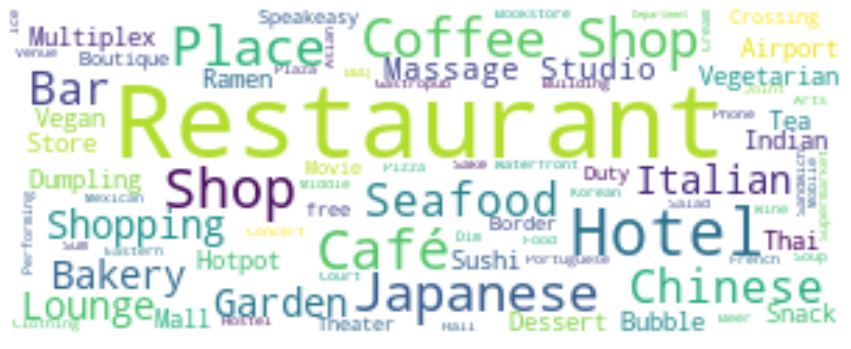

In [71]:
#wordcloud to visualise venues in the central area

cluster0 = []

for index, row in SG_merged.iterrows():
    if row[7] == 0:
        for i in range(8, 18):
            cluster0.append(str(row[i]))

text0 = ', '.join(cluster0)

wordcloud = WordCloud(width = 300, height = 120, background_color="white").generate(text0)

# Display the generated image:
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**"Heartland" Cluster**

The next biggest cluster are what we call the "Heartlands" - areas where most of the working class people stay in.
Here we see venues that are more accessible, like Food Courts, Supermarkets, and Asian/Seafood Restaurants.

In [72]:
#venue data for heartland cluster

SG_merged.loc[SG_merged['Cluster Labels'] == 1, SG_merged.columns[[0] + list(range(7, SG_merged.shape[1]))]]

,Area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,River Valley,1,Noodle House,Seafood Restaurant,Chinese Restaurant,BBQ Joint,Café,Food Court,Asian Restaurant,Dim Sum Restaurant,Yoga Studio,Sporting Goods Shop
16,Sembawang,1,Coffee Shop,Asian Restaurant,Chinese Restaurant,Bus Station,Shopping Mall,BBQ Joint,Park,Bistro,Café,Taxi Stand
17,Bishan,1,Coffee Shop,Chinese Restaurant,Bubble Tea Shop,Food Court,Ice Cream Shop,Thai Restaurant,Japanese Restaurant,Supermarket,Cosmetics Shop,Pharmacy
18,Clementi,1,Chinese Restaurant,Food Court,Asian Restaurant,Coffee Shop,Fried Chicken Joint,Bookstore,Stadium,Soup Place,French Restaurant,Fast Food Restaurant
19,Queenstown,1,Chinese Restaurant,Food Court,Coffee Shop,Supermarket,Café,Sandwich Place,Spa,Japanese Restaurant,Park,Hot Dog Joint
20,Kallang,1,BBQ Joint,Coffee Shop,Restaurant,Snack Place,Hostel,River,Fast Food Restaurant,Supermarket,Asian Restaurant,Bus Station
21,Geylang,1,Chinese Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Food Court,Dim Sum Restaurant,Asian Restaurant,Fast Food Restaurant,Noodle House,Supermarket,Steakhouse
22,Serangoon,1,Coffee Shop,Pet Store,Italian Restaurant,Seafood Restaurant,Market,Noodle House,BBQ Joint,Park,Café,Indian Restaurant
23,Toa Payoh,1,Food Court,Coffee Shop,Noodle House,Bakery,Snack Place,Frozen Yogurt Shop,Café,Supermarket,Chinese Restaurant,Fast Food Restaurant
24,Bukit Panjang,1,Food Court,Park,Convenience Store,Miscellaneous Shop,Fast Food Restaurant,Bus Station,Bike Trail,Market,Noodle House,Pool


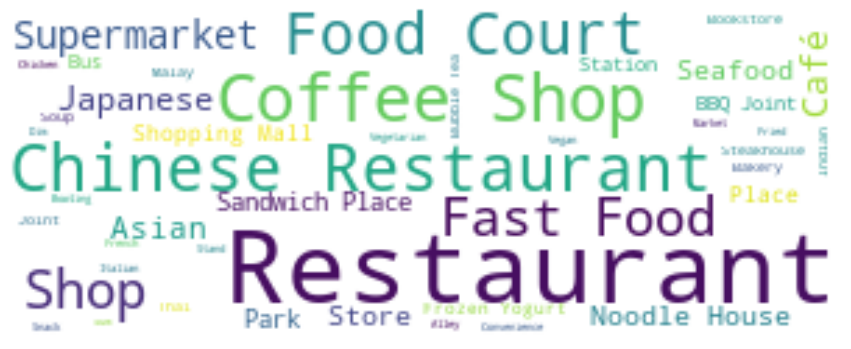

In [73]:
#wordcloud to visualise venues in the hearland area

cluster1 = []

for index, row in SG_merged.iterrows():
    if row[7] == 1:
        for i in range(8, 18):
            cluster1.append(str(row[i]))

text1 = ', '.join(cluster1)

wordcloud = WordCloud(width = 300, height = 120, background_color="white").generate(text1)

# Display the generated image:
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Results: Outliers

In [77]:
SG_merged.loc[SG_merged['Cluster Labels'] == 2, SG_merged.columns[[0] + list(range(7, SG_merged.shape[1]))]]

,Area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Bukit Timah,2,Trail,Mountain,Rest Area,Scenic Lookout,Nature Preserve,Lake,Tourist Information Center,Bike Trail,Park,Yoga Studio


In [78]:
SG_merged.loc[SG_merged['Cluster Labels'] == 3, SG_merged.columns[[0] + list(range(7, SG_merged.shape[1]))]]

,Area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Southern Islands,3,Cruise,Boat or Ferry,Pier,Cafeteria,BBQ Joint,Metro Station,Mexican Restaurant,Bus Line,Government Building,History Museum


In [79]:
SG_merged.loc[SG_merged['Cluster Labels'] == 4, SG_merged.columns[[0] + list(range(7, SG_merged.shape[1]))]]

,Area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Punggol,4,Fast Food Restaurant,Sandwich Place,Café,Dessert Shop,Gym / Fitness Center,Supermarket,Chinese Restaurant,Japanese Restaurant,High School,Diner


The three outlier neighborhoods are Bukit Timah, Southern Islands, and Punggol.

Bukit Timah is home to [Singapore's largest nature reserve](https://www.nparks.gov.sg/gardens-parks-and-nature/parks-and-nature-reserves/bukit-timah-nature-reserve), and we can see that from the venue data around the location. 

The Southern Islands are small islands, with [Sentosa](https://www.sentosa.com.sg) being the biggest one. All the Islands are tourist spots, and we can see that in the venue data as well. Sentosa has many high end resorts, spas, as well as a host of other tourist atractions.

Punggol can actually be considered a "Heartland" neighborhood as well, but it is one of Singapore's newest areas to be built and developed. As such, it has only 10 venues within a 750 metre radius of the town center (at least from Foursquare data), and it is an outlier in that sense. However if we look at the venues in that location, they typically fit those of a heartland neighborhood: fastfood restaurant, supermarket, etc.